Although the TABS API was substantially revised in version 2, all previous functionality has been preserved and is demonstrated below.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from tabs import DihedralInfoFromTorsionLib

Get a ``mol`` object

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 500, 500

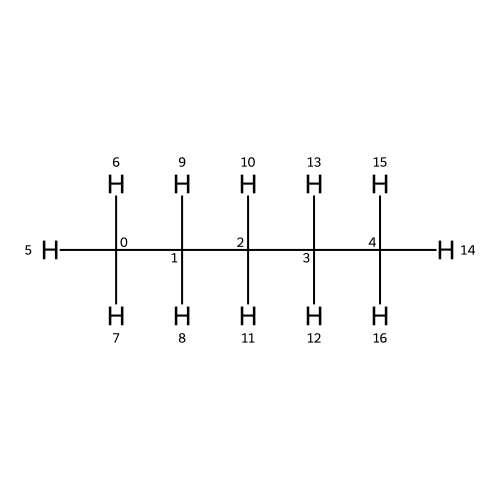

In [ ]:
mol = Chem.AddHs(Chem.MolFromSmiles("CCCCC"))
mol

First, we build a ``DihedralsInfo`` class object.

By building it with the experimental torsions using ``DihedralInfoFromTorsionLib``, it gets populated with information derived from the Torsion Library.

In [4]:
info = DihedralInfoFromTorsionLib(mol)

In [5]:
info.smarts, info.multiplicities, info.torsionTypes, info.indices

(['[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]'],
 [3, 3],
 [<TorsionType.REGULAR: 1>, <TorsionType.REGULAR: 1>],
 [[0, 1, 2, 3], [1, 2, 3, 4]])

Calculating nTABS with the new algorithm using the Burnside Lemma

In [6]:
info.GetnTABS()

6

If you try to calculate TABS when the ``mol`` object used to build the ``DihedralsInfo`` object had no conformers, you will receive a ValueError.

In [7]:
info.GetTABS()

ValueError: No conformers found in molecule.

The correct usage would be to pass a ``mol`` object with conformers as shown below.

In [8]:
Chem.rdDistGeom.EmbedMultipleConfs(mol, randomSeed=42, numConfs=10)
print(f"mol object has {mol.GetNumConformers()} conformers.")
test = DihedralInfoFromTorsionLib(mol)

mol object has 10 conformers.


You can either calculate the TABS by availing to calculate the torsion values of the conformers within ``GetTABS`` using ``rdMolTransforms.GetDihedralRad``

In [9]:
info.GetTABS()

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

Or you can precalculate the torsions in your preferred way and directly pass them to ``GetTABS``

In [10]:
ctors = test.GetConformerTorsions()
ctors
info.GetTABS(ctors)

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

Additional functionality available in the tabs package in ``plots`` and ``application``

In [11]:
from tabs import plots
from tabs import application

In [12]:
plots.VisualizeEnsemble(mol, dihedral=info.indices[0], showTABS=True);

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

If you want to extract the clusters of the conformers as defined by TABS, you can make use of ``SortEnsembleByTABS``

In [13]:
sortedEnsemble = application.SortEnsembleByTABS(mol)
sortedEnsemble

defaultdict(list, {23: [0, 3, 8, 9], 11: [1], 22: [2], 13: [4], 33: [5, 6, 7]})

Note on undefined stereochemistry:

Undefined stereocenter may result in ensembles of mixed stereo configurations (stereoisomers). If you calculate TABS on such, you might see large RMSD in conformers labeled with the same TABS because they are stereoisomers. Therefore, TABS has an in-build check and will throw a warning if an undefined stereocenter is detected.

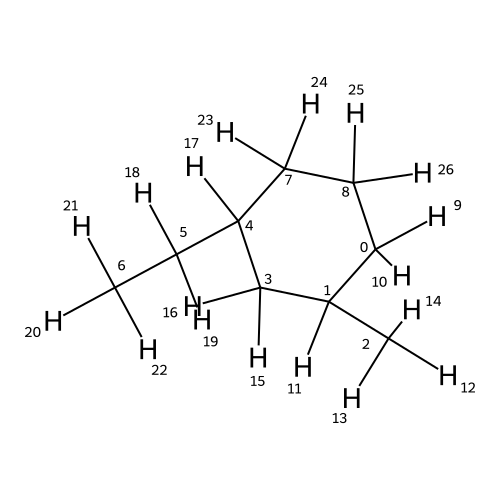

In [14]:
mol = Chem.AddHs(Chem.MolFromSmiles("C1C(C)CC(CC)CC1"))
mol

In [15]:
info = DihedralInfoFromTorsionLib(mol)

/localhome/braunje/.conda/envs/tabs/lib/python3.13/site-packages/tabs/torsions.py:486: UserWarning: WARNING: Molecule has chiral centers with undefined stereo
  torsionList = DihedralsInfo(m)


In [16]:
info.undefinedStereo

True